In [39]:
%matplotlib inline
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (13, 5)

In [40]:
y, sr = librosa.load('makeit.wav', duration=10.0)
ipd.Audio(y, rate=sr)

In [59]:
hop_length = 256 # samples per frame
onset_env = librosa.onset.onset_strength(y, sr=sr, hop_length=hop_length, n_fft=2048)

In [60]:
frames = range(len(onset_env))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

Text(0.5,1,'Novelty Function')

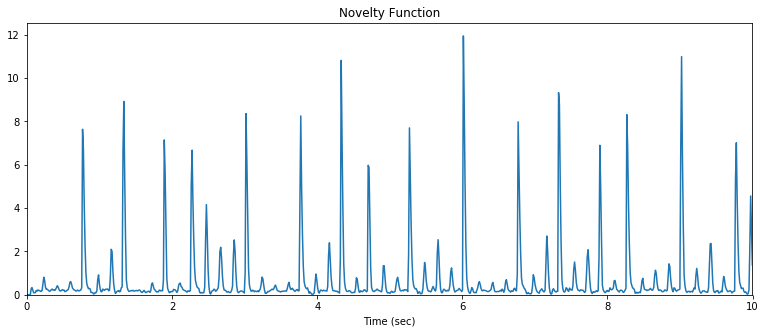

In [61]:
plt.plot(t, onset_env)
plt.xlim(0, t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

In [62]:
S = librosa.stft(onset_env, hop_length=1, n_fft=512)
fourier_tempogram = numpy.absolute(S)

Text(0.5,1,'Novelty Function')

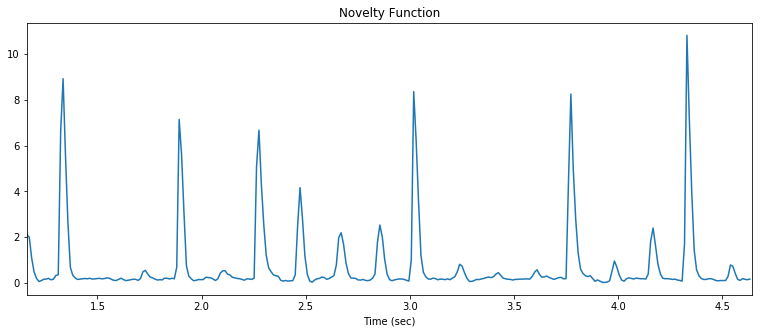

In [63]:
n0 = 100
n1 = 400
plt.plot(t[n0:n1], onset_env[n0:n1])
plt.xlim(t[n0], t[n1])
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

In [64]:
tmp = numpy.log1p(onset_env[n0:n1])
r = librosa.autocorrelate(tmp)

(0, 118.73798665273257)

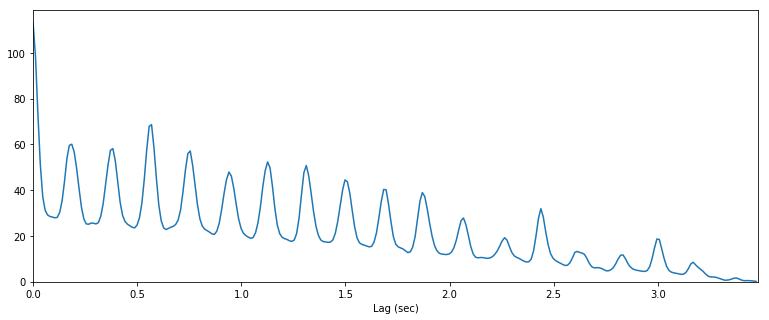

In [65]:
plt.plot(t[:n1-n0], r)
plt.xlim(t[0], t[n1-n0])
plt.xlabel('Lag (sec)')
plt.ylim(0)

/Users/pianistprogrammer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


(0, 103.34825572370713)

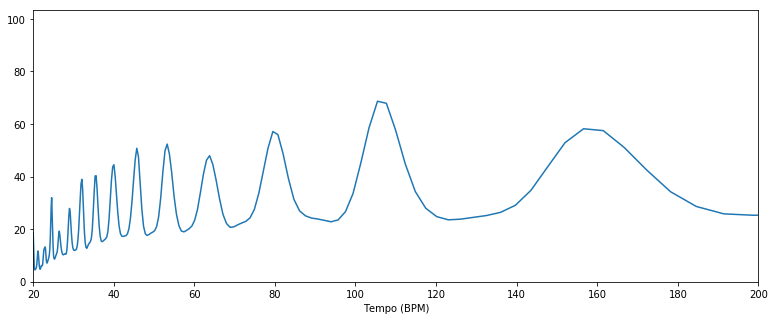

In [66]:
plt.plot(60/t[:n1-n0], r)
plt.xlim(20, 200)
plt.xlabel('Tempo (BPM)')
plt.ylim(0)

In [68]:
tempo = librosa.beat.tempo(y, sr=sr)
print(tempo)

[107.66601562]


In [71]:
T = len(y)/float(sr)
seconds_per_beat = 60.0/tempo[0]
beat_times = numpy.arange(0, T, seconds_per_beat)
beat_times

array([0.        , 0.55727891, 1.11455782, 1.67183673, 2.22911565,
       2.78639456, 3.34367347, 3.90095238, 4.45823129, 5.0155102 ,
       5.57278912, 6.13006803, 6.68734694, 7.24462585, 7.80190476,
       8.35918367, 8.91646259, 9.4737415 ])

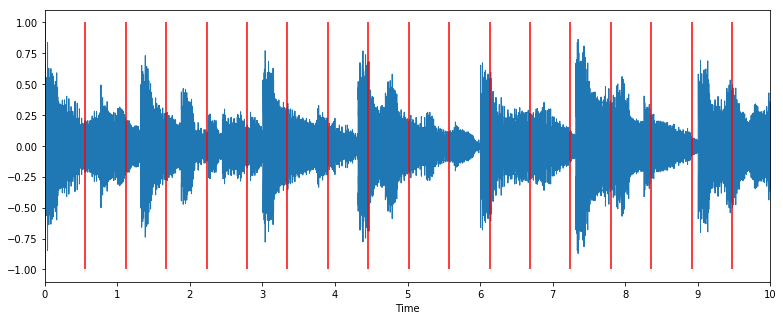

In [70]:
librosa.display.waveplot(y)
plt.vlines(beat_times, -1, 1, color='r')

In [74]:
clicks = librosa.clicks(beat_times, sr, length=len(y))
ipd.Audio(y + clicks, rate=sr)